In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# загружаем модели
from sklearn.linear_model import LinearRegression

# pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

# метрики
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

# ошибки
import warnings
warnings.filterwarnings('ignore') # для начала стоит оставить ворнинги вклченными
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# загружаем и смотрим
new_columns =["код", 'страна экспорта/импорта', "дата", "направление", "общая стоимость", "вес в кг", "Дэи", "федеральный округ", "место отгрузки"]
df_raw = pd.read_excel('meth.xlsx', sheet_name='Данные отчета', names = new_columns) 
# наименование столбцов на русском с пробелами и спецсимволами
# parquet - формат данных
# столбец "код" и "дэи" константа?
df_raw

,код,страна экспорта/импорта,дата,направление,общая стоимость,вес в кг,Дэи,федеральный округ,место отгрузки
0,2905110000 - МЕТАНОЛ (СПИРТ МЕТИЛОВЫЙ),FI - ФИНЛЯНДИЯ,12 2019,Экспорт,8697030.96,46476510.00,0.00,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,57000 - ПЕРМСКИЙ КРАЙ
1,2905110000 - МЕТАНОЛ (СПИРТ МЕТИЛОВЫЙ),FI - ФИНЛЯНДИЯ,12 2019,Экспорт,115771.02,499800.00,0.00,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,70000 - ТУЛЬСКАЯ ОБЛАСТЬ
2,2905110000 - МЕТАНОЛ (СПИРТ МЕТИЛОВЫЙ),KG - КЫРГЫЗСТАН,08 2019,Экспорт,5934.20,17400.00,0.00,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,22000 - НИЖЕГОРОДСКАЯ ОБЛАСТЬ
3,2905110000 - МЕТАНОЛ (СПИРТ МЕТИЛОВЫЙ),KG - КЫРГЫЗСТАН,12 2019,Экспорт,7463.76,9055.00,0.00,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,80000 - РЕСПУБЛИКА БАШКОРТОСТАН
4,2905110000 - МЕТАНОЛ (СПИРТ МЕТИЛОВЫЙ),KZ - КАЗАХСТАН,01 2019,Экспорт,192077.78,472260.00,0.00,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,36000 - САМАРСКАЯ ОБЛАСТЬ
...,...,...,...,...,...,...,...,...,...
997,2905110000 - МЕТАНОЛ (СПИРТ МЕТИЛОВЫЙ),"MD - МОЛДОВА, РЕСПУБЛИКА",01 2022,Экспорт,11088.48,21580.00,0.00,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,70000 - ТУЛЬСКАЯ ОБЛАСТЬ
998,2905110000 - МЕТАНОЛ (СПИРТ МЕТИЛОВЫЙ),BY - БЕЛАРУСЬ,01 2022,Экспорт,763.13,310000.00,0.00,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,49000 - НОВГОРОДСКАЯ ОБЛАСТЬ
999,2905110000 - МЕТАНОЛ (СПИРТ МЕТИЛОВЫЙ),FI - ФИНЛЯНДИЯ,01 2022,Экспорт,8888381.00,24347900.00,0.00,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,70000 - ТУЛЬСКАЯ ОБЛАСТЬ
1000,2905110000 - МЕТАНОЛ (СПИРТ МЕТИЛОВЫЙ),EE - ЭСТОНИЯ,01 2022,Экспорт,202532.89,520000.00,0.00,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,70000 - ТУЛЬСКАЯ ОБЛАСТЬ


In [3]:
df = pd.DataFrame(df_raw) # дубликат строки выше
df

,код,страна экспорта/импорта,дата,направление,общая стоимость,вес в кг,Дэи,федеральный округ,место отгрузки
0,2905110000 - МЕТАНОЛ (СПИРТ МЕТИЛОВЫЙ),FI - ФИНЛЯНДИЯ,12 2019,Экспорт,8697030.96,46476510.00,0.00,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,57000 - ПЕРМСКИЙ КРАЙ
1,2905110000 - МЕТАНОЛ (СПИРТ МЕТИЛОВЫЙ),FI - ФИНЛЯНДИЯ,12 2019,Экспорт,115771.02,499800.00,0.00,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,70000 - ТУЛЬСКАЯ ОБЛАСТЬ
2,2905110000 - МЕТАНОЛ (СПИРТ МЕТИЛОВЫЙ),KG - КЫРГЫЗСТАН,08 2019,Экспорт,5934.20,17400.00,0.00,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,22000 - НИЖЕГОРОДСКАЯ ОБЛАСТЬ
3,2905110000 - МЕТАНОЛ (СПИРТ МЕТИЛОВЫЙ),KG - КЫРГЫЗСТАН,12 2019,Экспорт,7463.76,9055.00,0.00,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,80000 - РЕСПУБЛИКА БАШКОРТОСТАН
4,2905110000 - МЕТАНОЛ (СПИРТ МЕТИЛОВЫЙ),KZ - КАЗАХСТАН,01 2019,Экспорт,192077.78,472260.00,0.00,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,36000 - САМАРСКАЯ ОБЛАСТЬ
...,...,...,...,...,...,...,...,...,...
997,2905110000 - МЕТАНОЛ (СПИРТ МЕТИЛОВЫЙ),"MD - МОЛДОВА, РЕСПУБЛИКА",01 2022,Экспорт,11088.48,21580.00,0.00,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,70000 - ТУЛЬСКАЯ ОБЛАСТЬ
998,2905110000 - МЕТАНОЛ (СПИРТ МЕТИЛОВЫЙ),BY - БЕЛАРУСЬ,01 2022,Экспорт,763.13,310000.00,0.00,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,49000 - НОВГОРОДСКАЯ ОБЛАСТЬ
999,2905110000 - МЕТАНОЛ (СПИРТ МЕТИЛОВЫЙ),FI - ФИНЛЯНДИЯ,01 2022,Экспорт,8888381.00,24347900.00,0.00,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,70000 - ТУЛЬСКАЯ ОБЛАСТЬ
1000,2905110000 - МЕТАНОЛ (СПИРТ МЕТИЛОВЫЙ),EE - ЭСТОНИЯ,01 2022,Экспорт,202532.89,520000.00,0.00,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,70000 - ТУЛЬСКАЯ ОБЛАСТЬ


In [4]:
df.info() # какие столбцы можно перевести в categorical? (не важно)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   код                      1002 non-null   object 
 1   страна экспорта/импорта  1002 non-null   object 
 2   дата                     1002 non-null   object 
 3   направление              1002 non-null   object 
 4   общая стоимость          1002 non-null   float64
 5   вес в кг                 1002 non-null   float64
 6   Дэи                      1002 non-null   float64
 7   федеральный округ        1002 non-null   object 
 8   место отгрузки           1002 non-null   object 
dtypes: float64(3), object(6)
memory usage: 70.6+ KB


In [5]:
df["дата"] = pd.to_datetime(df['дата'])

In [6]:
df.isnull().sum()

код                        0
страна экспорта/импорта    0
дата                       0
направление                0
общая стоимость            0
вес в кг                   0
Дэи                        0
федеральный округ          0
место отгрузки             0
dtype: int64

<AxesSubplot:>

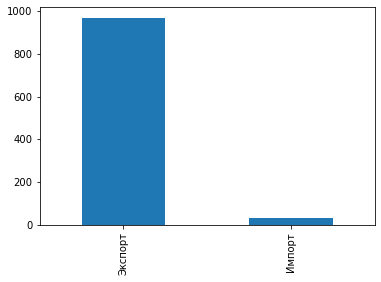

In [7]:
# посмотрим на экспорт и импорт
df['направление'].value_counts().plot(kind = "bar") # counts vs volume
# импорт из определенных регионов?

In [8]:
df.groupby(['направление'])['общая стоимость'].sum()

направление
Импорт       3982215.41
Экспорт   1613888358.37
Name: общая стоимость, dtype: float64

<AxesSubplot:xlabel='дата'>

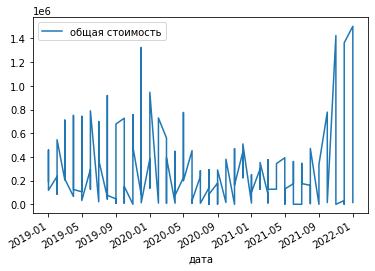

In [10]:
df_ = df[df['страна экспорта/импорта']=='KZ - КАЗАХСТАН']
df_[["дата", 'общая стоимость']].set_index("дата").plot()

<AxesSubplot:>

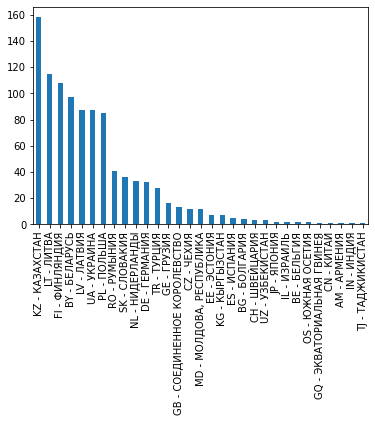

In [8]:
# посмотрим по направлениям отгрузки
df['страна экспорта/импорта'].value_counts().plot(kind = "bar") 
# counts vs volume 
# распределение/стабильность во времени (по месячно)
# новые направления

In [9]:
df.nunique(axis= 0)

код                           1
страна экспорта/импорта      31
дата                         37
направление                   2
общая стоимость            1001
вес в кг                    980
Дэи                           2
федеральный округ             7
место отгрузки               19
dtype: int64

<AxesSubplot:xlabel='общая стоимость'>

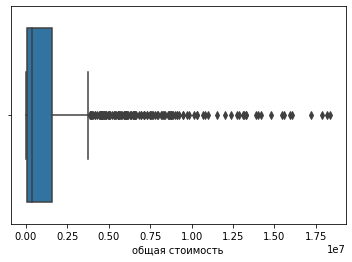

In [22]:
# посмотрим разброс значений
sns.boxplot(x = df['общая стоимость']) # pep8 
# distplot для такого типа данных более наглядный
# качество данных - могут ли быть стоимость или объем меньше 0 или больше 10^10

<AxesSubplot:ylabel='Density'>

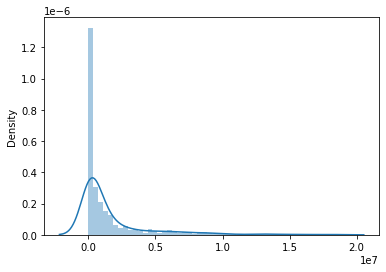

In [11]:
sns.distplot(x = df['общая стоимость']) # pep8 

<AxesSubplot:ylabel='Density'>

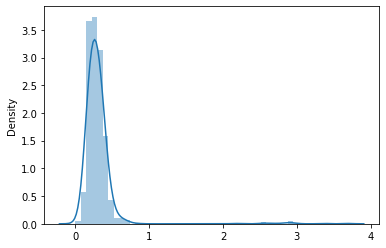

In [16]:
df['price'] = df['общая стоимость'] / df['вес в кг'] # не хвататает показателя
sns.distplot(x = df[df['price']< 5]['price'])

<AxesSubplot:xlabel='вес в кг'>

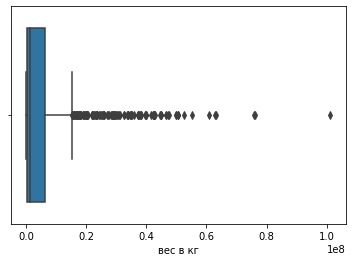

In [11]:
sns.boxplot(x=df['вес в кг'])

In [12]:
# видно что по весу есть несколько выбросов, удалим их
# убирается - .05 <  & > .95 
df_clean = df[~(df['вес в кг'] >= df['вес в кг'].max())] 
# удалит только df['вес в кг'].max()

# могут ли быть какие-то специфические направления где перевозят очень тяжелые или очень дорогие грузы - построить распределение 
# по странам, регионам и пр

<AxesSubplot:xlabel='вес в кг'>

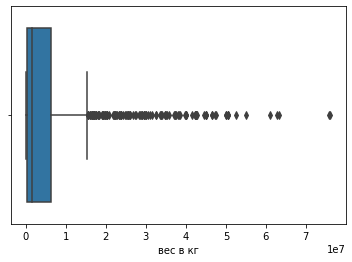

In [13]:
sns.boxplot(x=df_clean['вес в кг'])

In [14]:
print(f'до очистки: {df.shape[0]}')
print(f'после очистки: {df_clean.shape[0]}')
print(f'удалено строк: {df.shape[0] - df_clean.shape[0]}.')
print(f'процент удаленных: {((df.shape[0] - df_clean.shape[0]) * 100) / df.shape[0]:.2f}%')

до очистки: 1002
после очистки: 1001
удалено строк: 1.
процент удаленных: 0.10%


In [17]:
df.to_parquet('file.parquet') # backup

In [15]:
# посмотрим еще раз на данные
df_ml = df_clean.copy() # зачем копия?
df_ml.head()

,код,страна экспорта/импорта,дата,направление,общая стоимость,вес в кг,Дэи,федеральный округ,место отгрузки
0,2905110000 - МЕТАНОЛ (СПИРТ МЕТИЛОВЫЙ),FI - ФИНЛЯНДИЯ,2019-12-01,Экспорт,8697030.96,46476510.00,0.00,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,57000 - ПЕРМСКИЙ КРАЙ
1,2905110000 - МЕТАНОЛ (СПИРТ МЕТИЛОВЫЙ),FI - ФИНЛЯНДИЯ,2019-12-01,Экспорт,115771.02,499800.00,0.00,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,70000 - ТУЛЬСКАЯ ОБЛАСТЬ
2,2905110000 - МЕТАНОЛ (СПИРТ МЕТИЛОВЫЙ),KG - КЫРГЫЗСТАН,2019-08-01,Экспорт,5934.20,17400.00,0.00,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,22000 - НИЖЕГОРОДСКАЯ ОБЛАСТЬ
3,2905110000 - МЕТАНОЛ (СПИРТ МЕТИЛОВЫЙ),KG - КЫРГЫЗСТАН,2019-12-01,Экспорт,7463.76,9055.00,0.00,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,80000 - РЕСПУБЛИКА БАШКОРТОСТАН
4,2905110000 - МЕТАНОЛ (СПИРТ МЕТИЛОВЫЙ),KZ - КАЗАХСТАН,2019-01-01,Экспорт,192077.78,472260.00,0.00,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ,36000 - САМАРСКАЯ ОБЛАСТЬ


In [40]:
# для машинного обучения обучение лучше работает на данных в сопоставимых маштабах, попробуем маштабировать данные через min-max для признаков "общая стоимость и вес"
# тема актуальна для линейной регрессии с регуляризациями
scaler = MinMaxScaler()
data = df_ml[["общая стоимость", "вес в кг", 'направление', 'место отгрузки']] # fix
scaled = scaler.fit_transform(data[["общая стоимость", "вес в кг"]]) # fix 
print(scaled)

[[4.73422647e-01 6.10682490e-01]
 [6.30188387e-03 6.56716915e-03]
 [3.22918134e-04 2.28628811e-04]
 ...
 [4.83838784e-01 3.19921530e-01]
 [1.10247650e-02 6.83258895e-03]
 [3.38808795e-05 1.26138792e-05]]


In [30]:
# создадим функцию для обработки признаков по выбору
def transform_data(num_at, cat_at, dataframe): # typing
    """Passes the input df through the """
    pipeline = ColumnTransformer([
        ('num', MinMaxScaler(), num_at),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_at), #ignore errors because dataset is huge and might encounter new categories
    ])
    return pipeline.fit_transform(dataframe), pipeline

# функция по выводу результатов
def display_scores(scores):
    print(f"Scores:{np.round(scores/100000, decimals=2)}")
    print(f"Scores:{to_millions(scores.mean()):.2f}")
    print(f"Standard deviation: {scores.std()/1000000:.2f}")
                    
def to_millions(usd):
    return round(usd/1000000, 2)

In [31]:
# разбиваем датасет на для обучения
train_set, test_set = train_test_split(data, test_size=0.3, random_state = 42) # нигде далее не используется

# функиця для выбора столбцов и подготовка данных для этапов обучения

def prepare_data(dataset, chosen_column, df_num_attribs, df_cat_attribs, test=False): # chosen_column, df_num_attribs - NONE
    
    df_input = dataset.drop(chosen_column, axis=1) # внутрь if
    df_output = dataset[chosen_column].copy() 

    
    if not test:
        df_prepared, pipeline = transform_data(df_num_attribs, df_cat_attribs, df_input)
        return df_prepared, df_output, pipeline
    else: # ?
        return df_input, df_output

In [44]:
# подготовим данные для регресии, используя ранее подготовленные функции
df_prepared, df_output, pipeline = prepare_data(data,
                          ['общая стоимость'], # fix - list
                          ['вес в кг'], # fix - list
                          ['направление', 'место отгрузки'])

In [35]:
# линейная регрессия
lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_output) # остутсвует смещение таргета во времени

LinearRegression()

In [38]:
# метрики
df_predictions = lin_reg.predict(df_prepared) # предсказали на том же на чем и обучились
lin_mse = mean_squared_error(df_output, df_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f'R2:{r2_score(df_output, df_predictions):.3f}') # v
print(f'RMSE:{to_millions(lin_rmse)}')
# MAPE
# MAE
# бизнес метрика???
# коэффициенты

R2:0.886
RMSE:0.95


In [42]:
# тестовая выборка
X_test, y_test = prepare_data(test_set, "общая стоимость",'вес в кг',
                          ['направление', 'место отгрузки'], True) 
X_test_prepared = pipeline.transform(X_test) 
final_predictions = lin_reg.predict(X_test_prepared) # тестовая выборка уже была в обучении
lin_mse = mean_squared_error(y_test, final_predictions)
lin_rmse = np.sqrt(lin_mse)
print(f'R2: {r2_score(y_test, final_predictions):.3f}')
print(f'RMSE: {to_millions(lin_rmse)}')

R2: 0.885
RMSE: 0.92


In [ ]:
-1 - настроить vscode для разработки, почитать про PEP8 и использовать его при кодинга
0 - создать в гите веку develop и main
2 - папка notebooks для экспериментов, src - для итоговых скриптов
3 - оформить скрипт в виде .py выгрузку данных

4 - разбить ноутбук на логические блоки
3 - анализ данных должен помогать делать какие-то выводы и влиять на подготовку данных, должна быть временная перспектива
4 - что именно мы хотим предсказать, смещение таргета
4 - начать легче с деревянной модели, можно на посемпле на одном типе перевозки
5 - отдедьная функция по анализу качества 
6 - трэйн\тест для обучения, валидация по времени !!!